In [1]:
from astropy.io import fits
import os
import pandas as pd
import glob
import numpy as np
from astropy import units as u

In [2]:
hdu = fits.open('../realObs/fits/NGC5272_V_new.fits')
hdu=hdu[0]
data = hdu.data

In [3]:
Vtable = pd.read_csv('data/Vtable_adj.csv')
Btable = pd.read_csv('data/Btable_adj.csv')

In [7]:
np.mean(Vtable['mag'])

13.916798592033176

In [8]:
np.std(Vtable['mag'])

0.7197469376463572

In [9]:
len(Vtable)

1494

In [3]:
merge = Btable.merge(Vtable, how='cross',suffixes=('_B', '_V'))

In [4]:
merge

,Unnamed: 0_B,Unnamed: 0.1_B,id_B,xcentroid_B,ycentroid_B,sharpness_B,roundness1_B,roundness2_B,npix_B,sky_B,...,xcentroid_V,ycentroid_V,sharpness_V,roundness1_V,roundness2_V,npix_V,sky_V,peak_V,flux_V,mag_V
0,0,0,1,9.790258,-1.833574,0.848615,-0.324881,-0.936338,25,0.0,...,21.002756,0.620500,0.791488,-0.376853,-0.548601,25,0.0,301.633617,1.727666,14.004606
1,0,0,1,9.790258,-1.833574,0.848615,-0.324881,-0.936338,25,0.0,...,38.241919,0.732045,0.747388,-0.079008,-0.617443,25,0.0,251.389189,1.342446,14.302627
2,0,0,1,9.790258,-1.833574,0.848615,-0.324881,-0.936338,25,0.0,...,51.013667,0.691893,0.619264,0.223140,-0.300389,25,0.0,235.111266,1.407768,14.246500
3,0,0,1,9.790258,-1.833574,0.848615,-0.324881,-0.936338,25,0.0,...,218.923702,0.030619,0.238365,0.147541,-0.426111,25,0.0,143.692287,1.119231,14.517453
4,0,0,1,9.790258,-1.833574,0.848615,-0.324881,-0.936338,25,0.0,...,472.022245,0.264790,0.642032,0.177453,-0.087960,25,0.0,181.694268,1.348260,14.297522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852555,1239,1239,1240,1259.421958,3049.358376,0.703955,-0.118278,0.316871,25,0.0,...,2834.968654,3049.287874,0.713262,0.391319,0.251351,25,0.0,148.620473,1.285665,14.353680
1852556,1239,1239,1240,1259.421958,3049.358376,0.703955,-0.118278,0.316871,25,0.0,...,3013.091104,3050.212140,0.686435,-0.001924,-0.164120,25,0.0,751.523064,1.171419,14.463615
1852557,1239,1239,1240,1259.421958,3049.358376,0.703955,-0.118278,0.316871,25,0.0,...,2990.914565,3051.804628,0.974157,-0.178853,0.062558,25,0.0,180.217582,1.323550,14.319373
1852558,1239,1239,1240,1259.421958,3049.358376,0.703955,-0.118278,0.316871,25,0.0,...,513.492487,3053.755440,0.553895,-0.802456,-0.145762,25,0.0,325.002842,2.584973,13.528599


In [5]:
result = merge[(merge["xcentroid_B"] <= merge["xcentroid_V"] + 2 ) & (merge["xcentroid_B"] >= merge["xcentroid_V"] - 2 )  & (merge["ycentroid_B"] <= merge["ycentroid_V"] + 2 )  & (merge["ycentroid_B"] >= merge["ycentroid_V"] - 2 ) ]

In [6]:
result

,Unnamed: 0_B,Unnamed: 0.1_B,id_B,xcentroid_B,ycentroid_B,sharpness_B,roundness1_B,roundness2_B,npix_B,sky_B,...,xcentroid_V,ycentroid_V,sharpness_V,roundness1_V,roundness2_V,npix_V,sky_V,peak_V,flux_V,mag_V
28408,19,19,20,229.181445,17.725678,0.520865,0.098739,0.132338,25,0.0,...,228.934348,17.396740,0.576826,0.074506,-0.082381,25,0.0,2704.534390,3.683524,13.110229
32890,22,22,23,228.955971,17.441104,0.296161,-0.115682,-0.123923,25,0.0,...,228.934348,17.396740,0.576826,0.074506,-0.082381,25,0.0,2704.534390,3.683524,13.110229
180881,121,121,122,239.699991,291.645608,0.506336,-0.207775,-0.031581,25,0.0,...,239.834700,291.562747,0.357961,0.252835,0.181252,25,0.0,728.512902,1.308807,14.332606
180884,121,121,122,239.699991,291.645608,0.506336,-0.207775,-0.031581,25,0.0,...,240.217313,291.854844,0.299275,0.154308,-0.012417,25,0.0,743.720193,1.363284,14.284432
212296,142,142,143,1063.357940,392.531361,0.350255,0.210001,0.208321,25,0.0,...,1063.653078,392.631895,0.269073,-0.080733,-0.278508,25,0.0,2977.267088,4.304117,12.926294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677638,1122,1122,1123,1972.705044,2711.927076,0.496478,-0.383098,0.125198,25,0.0,...,1973.195773,2711.386926,0.328144,0.114687,0.055836,25,0.0,1062.837759,2.040197,13.808181
1683614,1126,1126,1127,1973.187816,2711.382837,0.550121,-0.180978,0.213597,25,0.0,...,1973.195773,2711.386926,0.328144,0.114687,0.055836,25,0.0,1062.837759,2.040197,13.808181
1685108,1127,1127,1128,1972.955161,2711.767175,0.473589,-0.035878,0.280380,25,0.0,...,1973.195773,2711.386926,0.328144,0.114687,0.055836,25,0.0,1062.837759,2.040197,13.808181
1759868,1177,1177,1178,3046.212392,2875.707698,0.569677,-0.044279,0.724996,25,0.0,...,3045.584638,2875.100731,0.389924,-0.084681,-0.150801,25,0.0,646.575442,1.000564,14.649853


In [7]:
result["x_rad"] = (result["xcentroid_V"] - 1568)
result["y_rad"] = (result["ycentroid_V"] - 1470)

/tmp/ipykernel_173/3395473553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["x_rad"] = (result["xcentroid_V"] - 1568)
/tmp/ipykernel_173/3395473553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["y_rad"] = (result["ycentroid_V"] - 1470)


In [8]:
result["rad"] = np.sqrt(result["x_rad"] *  result["x_rad"] +  result["y_rad"] *  result["y_rad"])

/tmp/ipykernel_173/3630885039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["rad"] = np.sqrt(result["x_rad"] *  result["x_rad"] +  result["y_rad"] *  result["y_rad"])


In [9]:
result["rad"] = result["rad"]*0.01014

/tmp/ipykernel_173/4000286439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["rad"] = result["rad"]*0.01014


In [11]:
result["rad"] = result["rad"] /24 * 360

/tmp/ipykernel_84/767750349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["rad"] = result["rad"] /24 * 360


In [10]:
result

,Unnamed: 0_B,Unnamed: 0.1_B,id_B,xcentroid_B,ycentroid_B,sharpness_B,roundness1_B,roundness2_B,npix_B,sky_B,...,roundness1_V,roundness2_V,npix_V,sky_V,peak_V,flux_V,mag_V,x_rad,y_rad,rad
28408,19,19,20,229.181445,17.725678,0.520865,0.098739,0.132338,25,0.0,...,0.074506,-0.082381,25,0.0,2704.534390,3.683524,13.110229,-1339.065652,-1452.603260,20.032989
32890,22,22,23,228.955971,17.441104,0.296161,-0.115682,-0.123923,25,0.0,...,0.074506,-0.082381,25,0.0,2704.534390,3.683524,13.110229,-1339.065652,-1452.603260,20.032989
180881,121,121,122,239.699991,291.645608,0.506336,-0.207775,-0.031581,25,0.0,...,0.252835,0.181252,25,0.0,728.512902,1.308807,14.332606,-1328.165300,-1178.437253,18.004533
180884,121,121,122,239.699991,291.645608,0.506336,-0.207775,-0.031581,25,0.0,...,0.154308,-0.012417,25,0.0,743.720193,1.363284,14.284432,-1327.782687,-1178.145156,17.999665
212296,142,142,143,1063.357940,392.531361,0.350255,0.210001,0.208321,25,0.0,...,-0.080733,-0.278508,25,0.0,2977.267088,4.304117,12.926294,-504.346922,-1077.368105,12.062287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677638,1122,1122,1123,1972.705044,2711.927076,0.496478,-0.383098,0.125198,25,0.0,...,0.114687,0.055836,25,0.0,1062.837759,2.040197,13.808181,405.195773,1241.386926,13.241245
1683614,1126,1126,1127,1973.187816,2711.382837,0.550121,-0.180978,0.213597,25,0.0,...,0.114687,0.055836,25,0.0,1062.837759,2.040197,13.808181,405.195773,1241.386926,13.241245
1685108,1127,1127,1128,1972.955161,2711.767175,0.473589,-0.035878,0.280380,25,0.0,...,0.114687,0.055836,25,0.0,1062.837759,2.040197,13.808181,405.195773,1241.386926,13.241245
1759868,1177,1177,1178,3046.212392,2875.707698,0.569677,-0.044279,0.724996,25,0.0,...,-0.084681,-0.150801,25,0.0,646.575442,1.000564,14.649853,1477.584638,1405.100731,20.675568


In [35]:
result['rad']

28408      20.032989
32890      20.032989
180881     18.004533
180884     17.999665
212296     12.062287
             ...    
1677638    13.241245
1683614    13.241245
1685108    13.241245
1759868    20.675568
1759870    20.675891
Name: rad, Length: 258, dtype: float64

In [11]:
result['distance'] = result['rad']
result['Vmag'] = result['mag_V']
result['Bmag'] = result['mag_B']

/tmp/ipykernel_173/2867632464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['distance'] = result['rad']
/tmp/ipykernel_173/2867632464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Vmag'] = result['mag_V']
/tmp/ipykernel_173/2867632464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [13]:
result

,Unnamed: 0_B,Unnamed: 0.1_B,id_B,xcentroid_B,ycentroid_B,sharpness_B,roundness1_B,roundness2_B,npix_B,sky_B,...,sky_V,peak_V,flux_V,mag_V,x_rad,y_rad,rad,distance,Vmag,Bmag
28408,19,19,20,229.181445,17.725678,0.520865,0.098739,0.132338,25,0.0,...,0.0,2704.534390,3.683524,13.110229,-1339.065652,-1452.603260,20.032989,20.032989,13.110229,13.733568
32890,22,22,23,228.955971,17.441104,0.296161,-0.115682,-0.123923,25,0.0,...,0.0,2704.534390,3.683524,13.110229,-1339.065652,-1452.603260,20.032989,20.032989,13.110229,13.351558
180881,121,121,122,239.699991,291.645608,0.506336,-0.207775,-0.031581,25,0.0,...,0.0,728.512902,1.308807,14.332606,-1328.165300,-1178.437253,18.004533,18.004533,14.332606,14.475320
180884,121,121,122,239.699991,291.645608,0.506336,-0.207775,-0.031581,25,0.0,...,0.0,743.720193,1.363284,14.284432,-1327.782687,-1178.145156,17.999665,17.999665,14.284432,14.475320
212296,142,142,143,1063.357940,392.531361,0.350255,0.210001,0.208321,25,0.0,...,0.0,2977.267088,4.304117,12.926294,-504.346922,-1077.368105,12.062287,12.062287,12.926294,13.303141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677638,1122,1122,1123,1972.705044,2711.927076,0.496478,-0.383098,0.125198,25,0.0,...,0.0,1062.837759,2.040197,13.808181,405.195773,1241.386926,13.241245,13.241245,13.808181,14.221895
1683614,1126,1126,1127,1973.187816,2711.382837,0.550121,-0.180978,0.213597,25,0.0,...,0.0,1062.837759,2.040197,13.808181,405.195773,1241.386926,13.241245,13.241245,13.808181,14.031932
1685108,1127,1127,1128,1972.955161,2711.767175,0.473589,-0.035878,0.280380,25,0.0,...,0.0,1062.837759,2.040197,13.808181,405.195773,1241.386926,13.241245,13.241245,13.808181,14.415046
1759868,1177,1177,1178,3046.212392,2875.707698,0.569677,-0.044279,0.724996,25,0.0,...,0.0,646.575442,1.000564,14.649853,1477.584638,1405.100731,20.675568,20.675568,14.649853,14.373274


In [12]:
result.to_csv("result.csv")

In [10]:
result =  pd.read_csv("result.csv")

In [14]:
result[(result["rad"] > 3.5) & (result["rad"] <= 6 ) ]

,Unnamed: 0,Unnamed: 0_B,Unnamed: 0.1_B,id_B,xcentroid_B,ycentroid_B,sharpness_B,roundness1_B,roundness2_B,npix_B,...,sky_V,peak_V,flux_V,mag_V,x_rad,y_rad,rad,distance,Vmag,Bmag
15,542704,363,363,364,1548.624229,1084.311463,0.313136,-0.112097,-0.160858,25,...,0.0,1204.229297,2.202406,13.717805,-19.348041,-385.490029,3.913789,3.913789,13.717805,14.422340
16,542705,363,363,364,1548.624229,1084.311463,0.313136,-0.112097,-0.160858,25,...,0.0,1116.537410,1.836578,13.932389,-19.210207,-386.097050,3.919867,3.919867,13.932389,14.422340
31,672807,450,450,451,1928.215124,1316.395901,0.345930,-0.111363,0.085331,25,...,0.0,1455.195159,2.721125,13.467962,360.334596,-153.367524,3.970980,3.970980,13.467962,14.497919
203,1097469,734,734,735,1992.869022,1548.237703,0.285506,-0.023373,0.051251,25,...,0.0,3212.702172,5.022148,12.744033,425.308456,78.277270,4.385062,4.385062,12.744033,13.892117
204,1100457,736,736,737,1992.553126,1548.050727,0.463619,0.249177,0.067606,25,...,0.0,3212.702172,5.022148,12.744033,425.308456,78.277270,4.385062,4.385062,12.744033,14.202779
234,1261983,844,844,845,1889.438148,1797.344710,0.570853,0.208064,-0.032497,25,...,0.0,1158.812437,2.141551,13.750906,321.815589,327.474200,4.655625,4.655625,13.750906,14.409268
235,1261984,844,844,845,1889.438148,1797.344710,0.570853,0.208064,-0.032497,25,...,0.0,1138.961326,1.958754,13.856306,321.455266,327.582151,4.653846,4.653846,13.856306,14.409268
236,1290389,863,863,864,1555.103641,1844.921680,0.708745,-0.095256,-0.475884,25,...,0.0,3220.445526,5.153998,12.713419,-14.829858,374.856632,3.804020,3.804020,12.713419,14.339620
237,1293377,865,865,866,1553.044163,1844.722523,0.320133,-0.140397,0.176177,25,...,0.0,3220.445526,5.153998,12.713419,-14.829858,374.856632,3.804020,3.804020,12.713419,13.918384


In [17]:
result = result[ result["rad"] < 8.1 ]

In [18]:
np.mean(result['mag_V'])

13.577069522584793

In [22]:
np.mean(result['mag_B'] - result['mag_V'])

0.5886555035839811

In [19]:
np.std(result['mag_V'])

0.5740184813229504

In [6]:
result["rad"] = result["rad"] /24 * 360

In [16]:
result = result["rad"] * 24/ 360

0.4400185124317385

In [43]:
result = result[(result["xcentroid_V"] >= 1000) & (result["xcentroid_V"] <= 2000)  & (result["ycentroid_V"] >= 1000)  & (result["ycentroid_V"] <= 2000)]

In [ ]:
result_inside = result[result["rad"] < 100]["xcentroid_V"]

In [31]:
inner_rad = 120 
outter_rad = 360

inner = result[result["rad"] <= inner_rad]
boundry = result[(result["rad"] > inner_rad) & (result["rad"] <= outter_rad)]  
outter = result[result["rad"] > outter_rad]
inin = result[result["rad"] <= 60]

In [50]:
result["color"] = result["mag_B"] - result["mag_V"]

In [52]:
result = result[(result["xcentroid_V"] >= 1000) & (result["xcentroid_V"] <= 2000)  & (result["ycentroid_V"] >= 1000)  & (result["ycentroid_V"] <= 2000)]
blue = result[result["color"] <= 0.25]
mid = result[(result["color"] > 0.25) & (result["color"] <= 0.75)]  
red = result[result["color"] > 0.75]

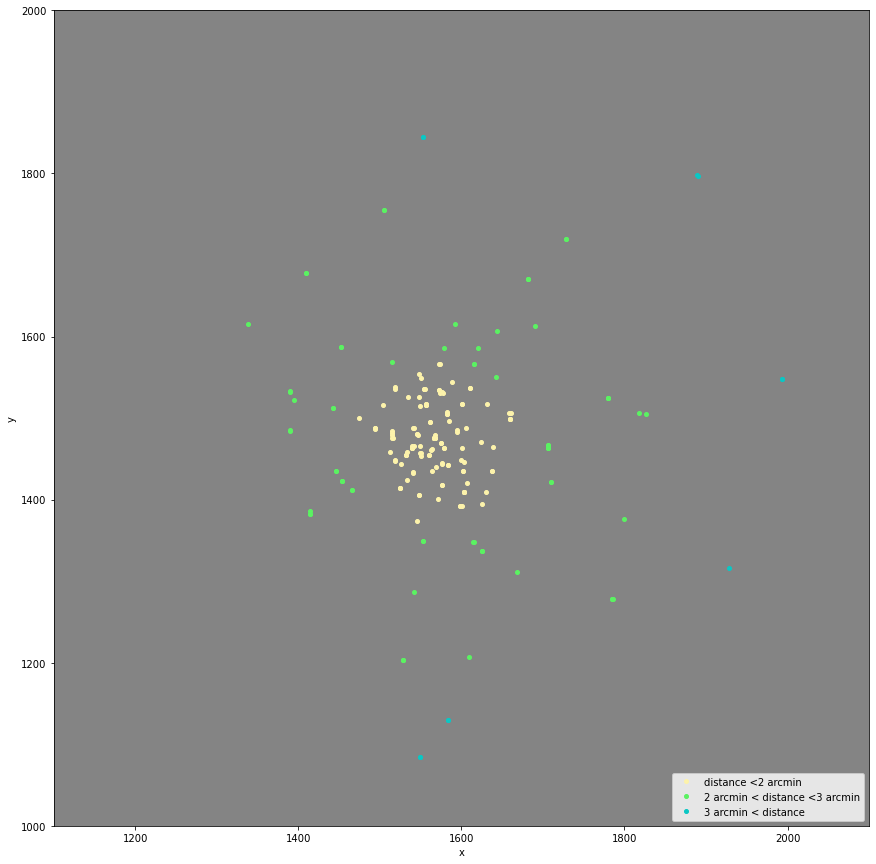

In [49]:

# importing the required module
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,figsize=(15, 15))
ax.set_aspect('equal')
# x axis values
x = result["xcentroid_V"]
# corresponding y axis values
y = result["ycentroid_V"]

ax.set_facecolor('#848484')

plt.plot(inner["xcentroid_V"], inner["ycentroid_V"],'.', color = '#fdf3ab', markersize = 8)
plt.plot(boundry["xcentroid_V"], boundry["ycentroid_V"],'.', color = '#5bf262', markersize = 8)
plt.plot(outter["xcentroid_V"], outter["ycentroid_V"],'.', color = '#0bc7c4', markersize = 8)
plt.legend(['distance <2 arcmin', '2 arcmin < distance <3 arcmin', '3 arcmin < distance'])
fig.savefig('temp.png', transparent=True)

# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('y')
plt.xlim(1100,2100)
plt.ylim(1000,2000)
  
# function to show the plot
plt.show()

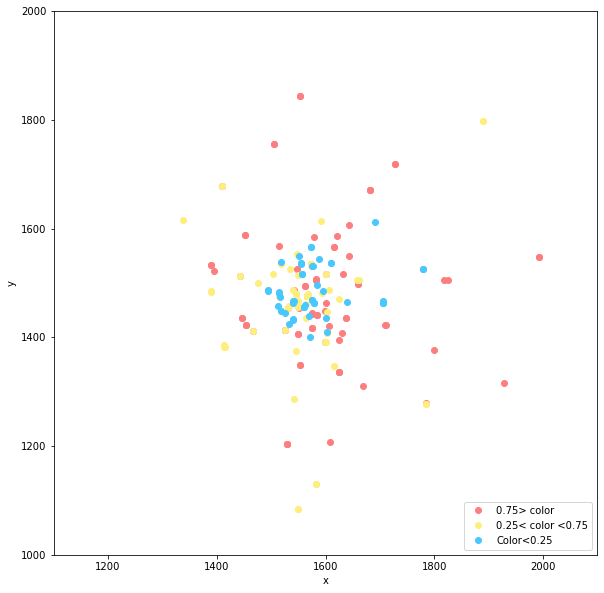

In [63]:

# importing the required module
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,figsize=(10, 10))
ax.set_aspect('equal')
# x axis values
x = result["xcentroid_V"]
# corresponding y axis values
y = result["ycentroid_V"]

#ax.set_facecolor('#848484')

plt.plot(red["xcentroid_V"], red["ycentroid_V"],'.', color = '#fd7e7e', markersize = 12)
plt.plot(mid["xcentroid_V"], mid["ycentroid_V"],'.', color = '#fdee7e', markersize = 12)
plt.plot(blue["xcentroid_V"], blue["ycentroid_V"],'.', color = '#49c7ff', markersize = 12)
plt.legend([  '0.75> color','0.25< color <0.75', 'Color<0.25'])

# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('y')
plt.xlim(1100,2100)
plt.ylim(1000,2000)
fig.savefig('temp.png', transparent=True)
# function to show the plot
plt.show()

In [1]:

# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = result["mag_B"] - result["mag_V"]
# corresponding y axis values
y = result["mag_V"]

# plotting the points 
scatter = plt.scatter(x, y)

ax = scatter.axes
#plt.yaxis_inverted
plt.gca().invert_yaxis()

# naming the x axis
plt.xlabel('B-V')
# naming the y axis
plt.ylabel('magnitude')
#plt.xlim(-0.4,1.6)
plt.ylim(-22,-9)
plt.legend(['distance <2 arcmin', '2 arcmin < distance <3 arcmin', '3 arcmin < distance'])
# giving a title to my graph
plt.title('H-R diagram')

  
# function to show the plot
plt.show()

NameError: name 'result' is not defined

In [13]:
result = result[(result["xcentroid_V"] >= 1000) & (result["xcentroid_V"] <= 2000)  & (result["ycentroid_V"] >= 1000)  & (result["ycentroid_V"] <= 2000)]
blue = result[result["color"] <= 0.25]
mid = result[(result["color"] > 0.25) & (result["color"] <= 0.75)]  
red = result[result["color"] > 0.75]

KeyError: 'color'

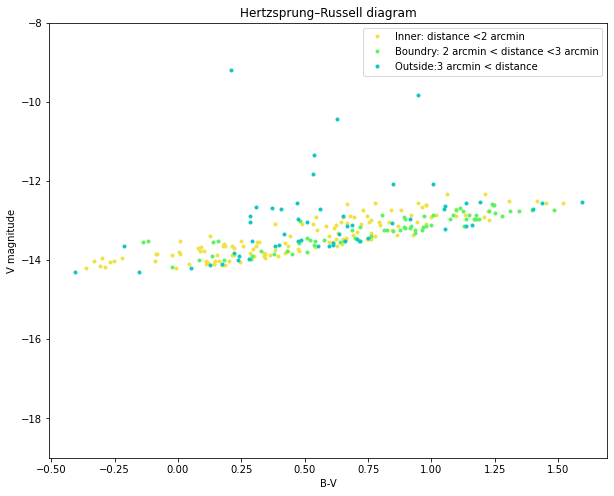

In [43]:

# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = result["mag_B"] - result["mag_V"]
# corresponding y axis values
y = -1 * result["mag_V"]

# plotting the points 
fig, ax = plt.subplots(1,figsize=(10, 8))


plt.plot(red["xcentroid_V"], red["ycentroid_V"],'.', color = '#fd7e7e', markersize = 12)
plt.plot(mid["xcentroid_V"], mid["ycentroid_V"],'.', color = '#fdee7e', markersize = 12)
plt.plot(blue["xcentroid_V"], blue["ycentroid_V"],'.', color = '#49c7ff', markersize = 12)

plt.legend(['Inner: distance <2 arcmin', 'Boundry: 2 arcmin < distance <3 arcmin', 'Outside:3 arcmin < distance'])

#plt.yaxis_inverted

# naming the x axis
plt.xlabel('B-V')
# naming the y axis
plt.ylabel('V magnitude')
#plt.xlim(-0.4,1.6)
plt.ylim(-19,-8)
# giving a title to my graph
plt.title('Hertzsprung–Russell diagram')

  
# function to show the plot
plt.show()

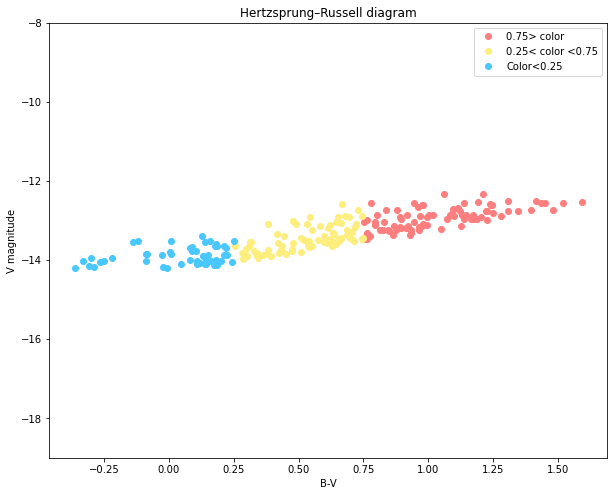

In [66]:

# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = result["mag_B"] - result["mag_V"]
# corresponding y axis values
y = -1 * result["mag_V"]

# plotting the points 
fig, ax = plt.subplots(1,figsize=(10, 8))

plt.plot(red["color"], -1 * red["mag_V"],'.', color = '#fd7e7e', markersize = 12)
plt.plot(mid["color"], -1 * mid["mag_V"],'.', color = '#fdee7e', markersize = 12)
plt.plot(blue["color"], -1 * blue["mag_V"],'.', color = '#49c7ff', markersize = 12)

#plt.plot(inin["mag_B"] - inin["mag_V"], -1 * inin["mag_V"],'.', color = '#252524')
plt.legend([  '0.75> color','0.25< color <0.75', 'Color<0.25'])
#plt.yaxis_inverted

# naming the x axis
plt.xlabel('B-V')
# naming the y axis
plt.ylabel('V magnitude')
#plt.xlim(-0.4,1.6)
plt.ylim(-19,-8)
# giving a title to my graph
plt.title('Hertzsprung–Russell diagram')

  
# function to show the plot
plt.show()